In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["label"] = iris.target
df.columns = [
    "sepal length", "sepal width", "petal length", "petal width", "label"
]

data = np.array(df.iloc[:100, [0, 1, -1]])
X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

$$
\mathbf{w} = \mathbf{w} + \eta\cdot(y - \hat{y})\cdot x^{\top}
$$

In [2]:
class LogisticRegressionClassifier:
    def __init__(self, max_iter=500, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def data_matrix(self, X):
        """
        Add bias term (intercept)
        """
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])

        return data_mat

    def fit(self, X, y):
        data_mat = self.data_matrix(X)
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)
        for _ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                err = y[i] - result
                self.weights += self.learning_rate * err * np.transpose([data_mat[i]])

        print(f"LogisticRegression Model: learning_rate = {self.learning_rate}, max_iter = {self.max_iter}.")

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for X, y in zip(X_test, y_test):
            result = np.dot(X, self.weights)
            if (result > 0 and y == 1) or (result < 0  and y == 0):
                right += 1

        return right / len(X_test)

In [3]:
clf = LogisticRegressionClassifier()
clf.fit(X_train, y_train)

LogisticRegression Model: learning_rate = 0.01, max_iter = 500.


In [4]:
clf.score(X_test, y_test)

1.0

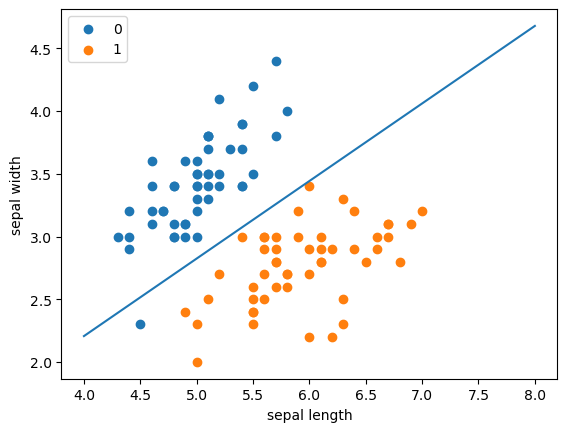

In [5]:
X_points = np.linspace(4, 8)
y = - (clf.weights[1] * X_points + clf.weights[0]) / clf.weights[2]
plt.plot(X_points, y)
plt.scatter(X[:50, 0], X[:50, 1], label="0")
plt.scatter(X[50:, 0], X[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

## scikit-learn

In [6]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

print(clf.coef_, clf.intercept_)

[[ 2.79438171 -2.53650358]] [-7.36694203]


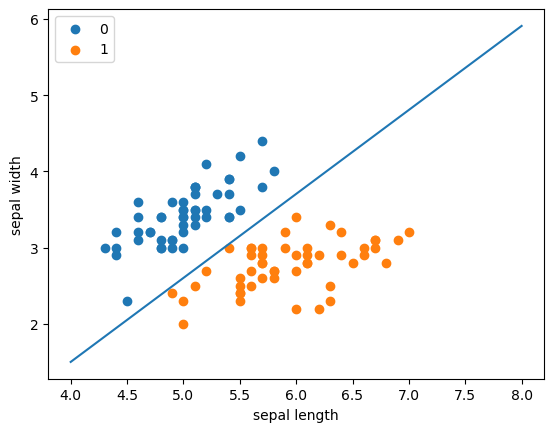

In [7]:
X_points = np.linspace(4, 8)
y = - (clf.coef_[0][0] * X_points + clf.intercept_) / clf.coef_[0][1]
plt.plot(X_points, y)
plt.scatter(X[:50, 0], X[:50, 1], label="0")
plt.scatter(X[50:, 0], X[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()